In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Global_Space_Exploration_Dataset.csv')

In [3]:
df.head(20)

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277
5,USA,2011,Down-sized holistic methodology,Unmanned,North Kevin,Research,22.76,85,Nuclear Propulsion,Low,France,166
6,Germany,2011,Adaptive coherent definition,Manned,Wilsonburgh,Spy,9.33,81,Solar Propulsion,High,"Japan, Russia, India",203
7,India,2012,Innovative 6thgeneration algorithm,Unmanned,South William,Weather,6.62,69,Solar Propulsion,Low,"India, UK, China",25
8,Israel,2024,Business-focused exuding contingency,Manned,Edwardstad,Navigation,13.25,60,Solar Propulsion,Low,"France, China",341
9,Israel,2011,Cross-group incremental function,Unmanned,Port Carla,Communication,23.76,66,Reusable Rocket,High,Japan,107


In [4]:
df.shape

(3000, 12)

In [5]:
df.isna().sum()

Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Collaborating Countries'] = df['Collaborating Countries'].str.split(', ')

In [8]:
df = df.explode('Collaborating Countries')

In [9]:
df = df.rename(columns={'Country': 'Main Country', 'Collaborating Countries': 'Collaborating Country'})

In [10]:
df.head(10)

,Main Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Israel,236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,China,238
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,Israel,238
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,USA,238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,Israel,277


In [11]:
df['Mission Name'].drop_duplicates()
print("There are 3000 rows and 3000 individual mission names wih drop duplicates.\n"
        "Each mission has a unique name so therefore, 'Mission Name' won't be useful in\n"
        "our machine learning project and can be dropped\n"
     )

There are 3000 rows and 3000 individual mission names wih drop duplicates.
Each mission has a unique name so therefore, 'Mission Name' won't be useful in
our machine learning project and can be dropped



In [12]:
df = df.drop('Mission Name', axis=1)

In [13]:
df.head()

,Main Country,Year,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Israel,236


In [14]:
df['Launch Site'] = df['Launch Site'].str.strip()
df['Launch Site'].drop_duplicates()

0               Sheilatown
1             New Ericfurt
2         Port Kaitlynstad
3                Mariastad
4       North Jasonborough
               ...        
2994      East Elaineburgh
2995           East Shawna
2996        Douglasborough
2997             Bellhaven
2998            Deniseview
Name: Launch Site, Length: 2702, dtype: object

In [15]:
print(
    "There are 3,000 rows and 2,999 unique mission names after dropping duplicates.\n"
    "All missions except one have a unique launch site, so 'Launch Site' is not useful\n"
    "for our machine learning project and can be dropped."
)

There are 3,000 rows and 2,999 unique mission names after dropping duplicates.
All missions except one have a unique launch site, so 'Launch Site' is not useful
for our machine learning project and can be dropped.


In [16]:
df = df.drop('Launch Site', axis=1)

In [17]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236


In [18]:
df['Duration (in Years)'] = (df['Duration (in Days)'] / 365.25)

In [19]:
df['Budget per Year (in Billion $)'] = (df['Budget (in Billion $)'] / df['Duration (in Years)']).round(2)

In [20]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $)
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94


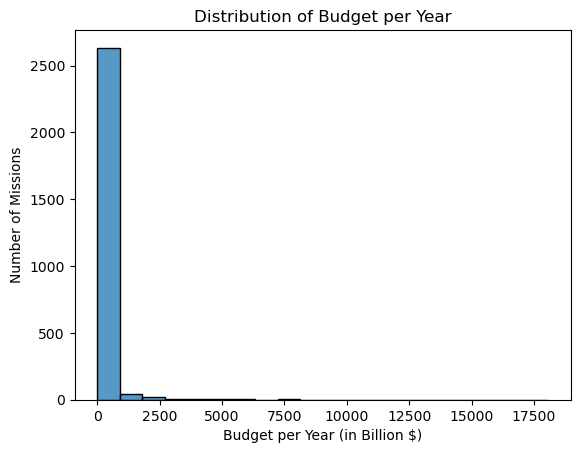

In [21]:
sns.histplot(df['Budget per Year (in Billion $)'].drop_duplicates(), bins=20)
plt.xlabel('Budget per Year (in Billion $)')
plt.ylabel('Number of Missions')
plt.title('Distribution of Budget per Year')
plt.show()

In [22]:
df['Budget per Year (in Billion $)'].max()

18072.57

In [23]:
df['Budget per Year (in Billion $)'].min()

0.62

In [24]:
df['Budget Category'] = pd.cut(df['Budget per Year (in Billion $)'], bins=[0, 10, 100, float('inf')], labels=['Low', 'Mid', 'High'])

In [25]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $),Budget Category
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94,Mid


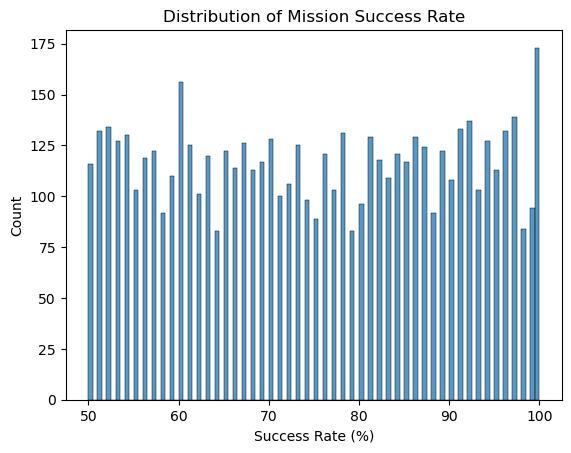

In [26]:
sns.histplot(df['Success Rate (%)'], bins=100)
plt.title('Distribution of Mission Success Rate')
plt.show()

In [27]:
avg_success_year = df.groupby('Year')['Success Rate (%)'].mean().reset_index()

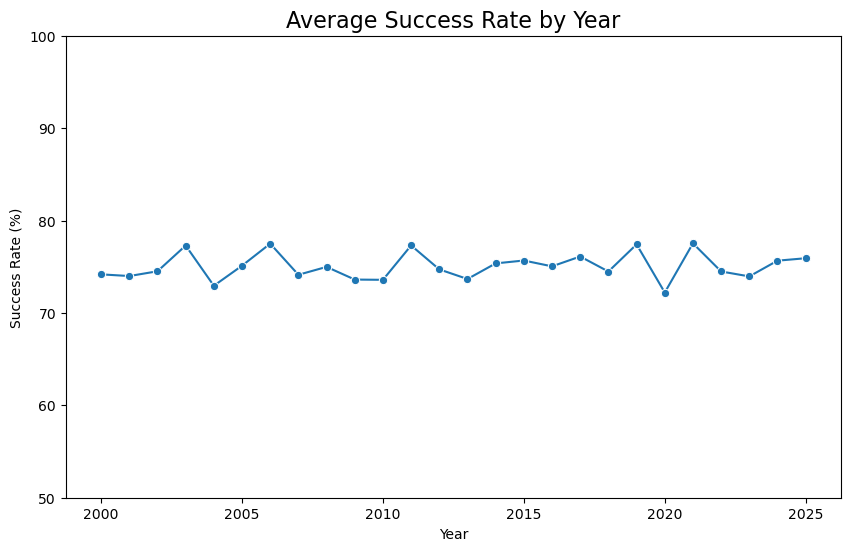

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_success_year , x='Year', y='Success Rate (%)', marker='o')
plt.title('Average Success Rate by Year', fontsize=16)
plt.ylim(50, 100)
plt.show()

In [29]:
avg_success_country = df.groupby('Main Country')['Success Rate (%)'].mean().reset_index()

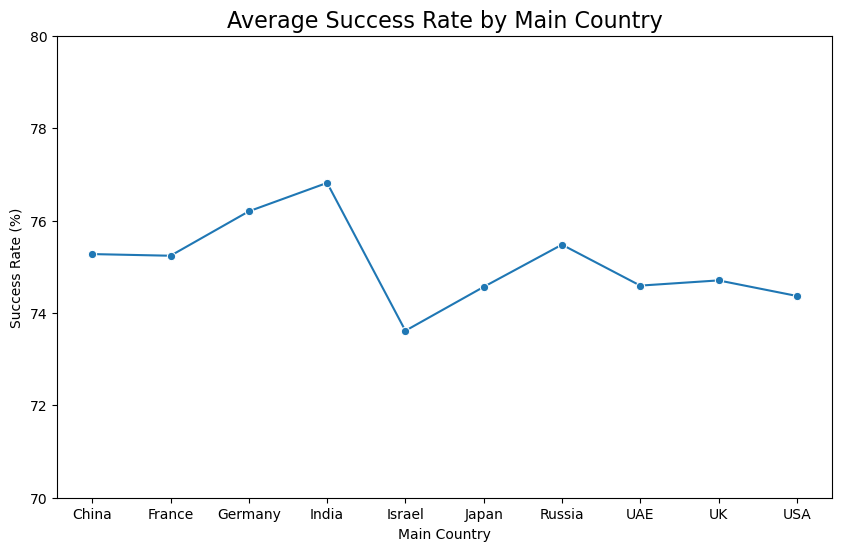

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_success_country , x='Main Country', y='Success Rate (%)', marker='o')
plt.title('Average Success Rate by Main Country', fontsize=16)
plt.ylim(70, 80)
plt.show()

In [31]:
avg_success_col_country = df.groupby('Collaborating Country')['Success Rate (%)'].mean().reset_index()

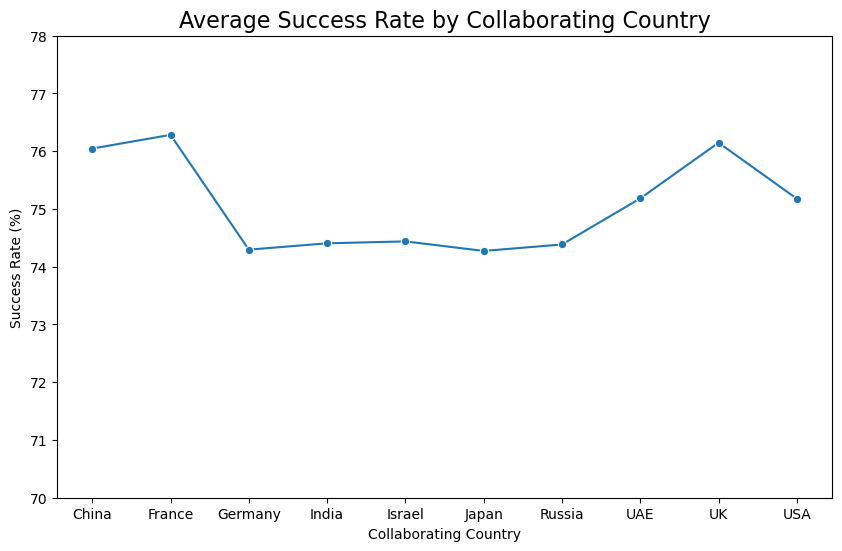

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_success_col_country , x='Collaborating Country', y='Success Rate (%)', marker='o')
plt.title('Average Success Rate by Collaborating Country', fontsize=16)
plt.ylim(70, 78)
plt.show()

In [33]:
avg_success_type = df.groupby('Mission Type')['Success Rate (%)'].mean().reset_index()

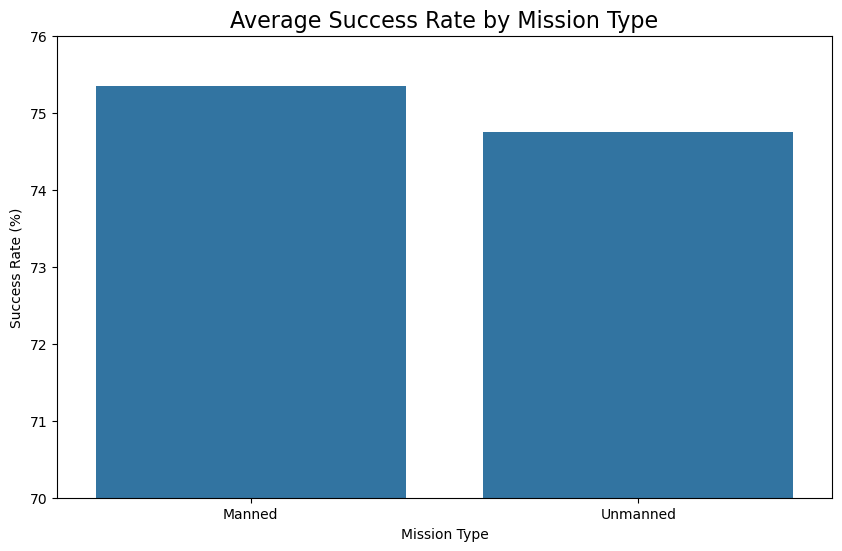

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_success_type , x='Mission Type', y='Success Rate (%)')
plt.title('Average Success Rate by Mission Type', fontsize=16)
plt.ylim(70, 76)
plt.show()

In [35]:
avg_success_satellite = df.groupby('Satellite Type')['Success Rate (%)'].mean().reset_index()

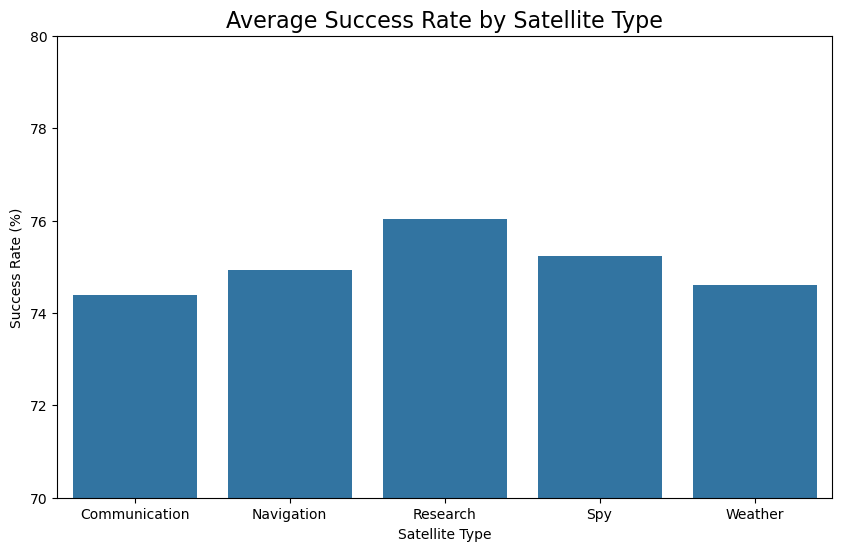

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_success_satellite , x='Satellite Type', y='Success Rate (%)')
plt.title('Average Success Rate by Satellite Type', fontsize=16)
plt.ylim(70, 80)
plt.show()

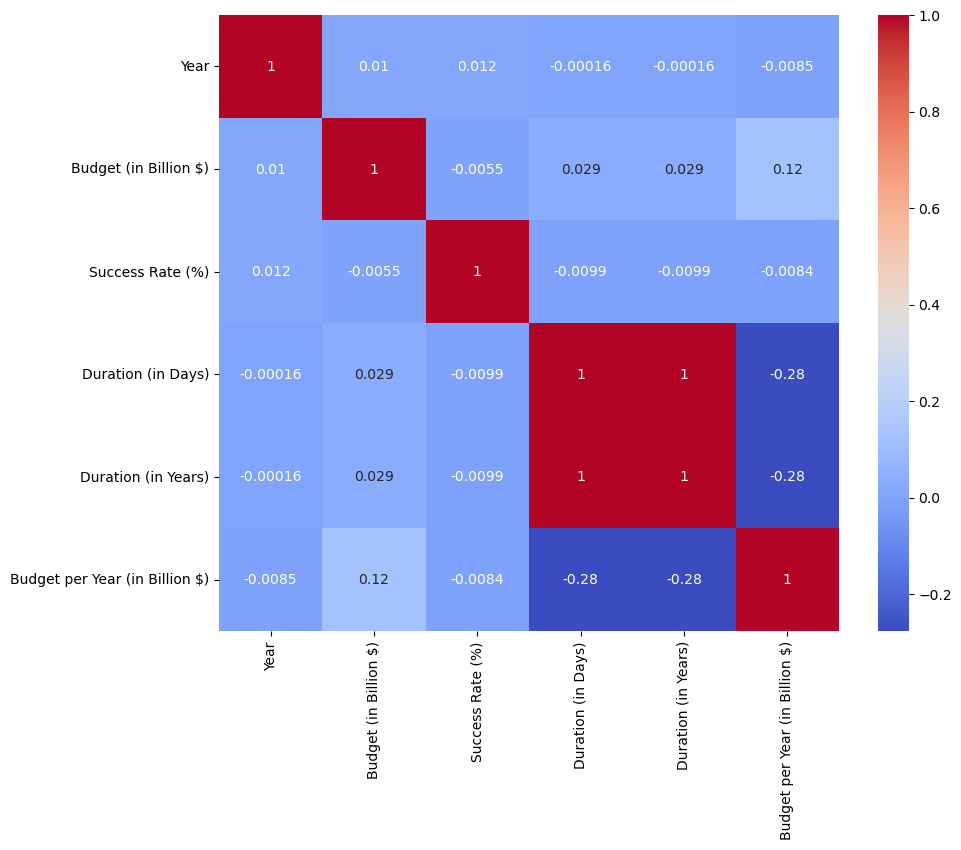

In [37]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [38]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $),Budget Category
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94,Mid


In [39]:
nominal_cols = df[['Main Country','Mission Type','Satellite Type','Technology Used','Collaborating Country']]
ordinal_cols = df[['Environmental Impact', 'Budget Category']]

In [40]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [41]:
one_encoder = OneHotEncoder(sparse_output=False)
nominal = one_encoder.fit_transform(nominal_cols)

In [42]:
ohe_f_names = one_encoder.get_feature_names_out(nominal_cols.columns)

In [43]:
ohe_df = pd.DataFrame(nominal,columns=ohe_f_names,index=df.index)

In [44]:
ohe_df.head()

,Main Country_China,Main Country_France,Main Country_Germany,Main Country_India,Main Country_Israel,Main Country_Japan,Main Country_Russia,Main Country_UAE,Main Country_UK,Main Country_USA,...,Collaborating Country_China,Collaborating Country_France,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_encoded = pd.concat([df,ohe_df],axis=1)

In [46]:
df_encoded.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),...,Collaborating Country_China,Collaborating Country_France,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
ord_encoder = OrdinalEncoder()
ordinal = ord_encoder.fit_transform(ordinal_cols)

In [48]:
or_df = pd.DataFrame(ordinal,
             columns=[col + '_ord' for col in ordinal_cols],
            index=df.index)
or_df

,Environmental Impact_ord,Budget Category_ord
0,2.0,2.0
0,2.0,2.0
0,2.0,2.0
1,0.0,2.0
1,0.0,2.0
...,...,...
2997,1.0,0.0
2998,1.0,2.0
2998,1.0,2.0
2998,1.0,2.0


In [49]:
df_final = pd.concat([df_encoded,or_df],axis=1)

In [50]:
df_final.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),...,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA,Environmental Impact_ord,Budget Category_ord
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [51]:
df2 = df_final.select_dtypes(include='number')

In [52]:
df2.head()

,Year,Budget (in Billion $),Success Rate (%),Duration (in Days),Duration (in Years),Budget per Year (in Billion $),Main Country_China,Main Country_France,Main Country_Germany,Main Country_India,...,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA,Environmental Impact_ord,Budget Category_ord
0,2008,16.20,90,112,0.306639,52.83,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
0,2008,16.20,90,112,0.306639,52.83,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
0,2008,16.20,90,112,0.306639,52.83,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
1,2018,29.04,99,236,0.646133,44.94,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2018,29.04,99,236,0.646133,44.94,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [53]:
X = df2.drop(columns=['Success Rate (%)'])
y = df2['Success Rate (%)']

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [55]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [57]:
base_model = LinearRegression()
rf_model = RandomForestRegressor()
gr_model = GradientBoostingRegressor()

In [58]:
base_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [59]:
def evaluate_model(model,X_test,y_test,name='Model'):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    
    print(f"--{name}--")
    print(f"MAE:{mae:.2f}")
    print(f"MSE:{mse:.2f}")
    print(f"RSME:{rmse:.2f}")
    print(f"R2:{r2:.2f}")
    print("-"*20)
    return r2

In [60]:
evaluate_model(base_model,X_test,y_test,name='base_model')

--base_model--
MAE:13.18
MSE:228.61
RSME:15.12
R2:-0.00
--------------------


-0.0008181065378378705

In [61]:
evaluate_model(rf_model,X_test,y_test,name='rf_model')

--rf_model--
MAE:8.23
MSE:109.89
RSME:10.48
R2:0.52
--------------------


0.5189273580112053

In [62]:
evaluate_model(gr_model,X_test,y_test,name='gr_model')

--gr_model--
MAE:12.56
MSE:210.08
RSME:14.49
R2:0.08
--------------------


0.08029108879061186

In [63]:
model = rf_model

In [64]:
y_pred = model.predict(X_test)
y_pred

array([60.69, 71.56, 70.67, ..., 62.42, 70.33, 75.74])

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
evaluate_model(best_model,X_test,y_test,name='grid_model')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END m

0.522133890937226

In [67]:
best_model = grid_search.best_estimator_
evaluate_model(best_model,X_test,y_test,name='grid_model')

--grid_model--
MAE:8.27
MSE:109.16
RSME:10.45
R2:0.52
--------------------


0.522133890937226

In [70]:
y_pred = best_model.predict(X_test)
y_pred

array([64.80333333, 69.67333333, 69.61271228, ..., 63.15666667,
       70.82333333, 76.64186508])

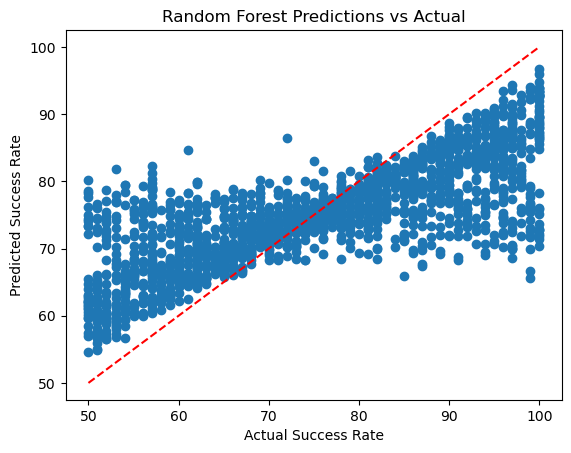

In [71]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Success Rate')
plt.ylabel('Predicted Success Rate')
plt.title('Random Forest Predictions vs Actual')
plt.show()

In [72]:
joblib.dump(best_model, 'regression.joblib')

['regression.joblib']

In [73]:
import gradio as gr

In [74]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $),Budget Category
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94,Mid
